# Датасет

## загрузка данных

In [2]:
import pandas as pd
import numpy as np

from tqdm import tqdm
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Dataset Description  
Описание данных  
Данные состоят из 3 файлов:  

products.csv - товары с их харакретистиками  
transactions.csv - транзакции покупателей  
sample_submission.csv - пример файла, для понимания формата данных ответов  


**products.csv**  
product_id - уникальный идентификатор товара  
product_name - название товара  
aisle_id - уникальный идентификатор подкатегории  
department_id - уникальный идентификатор категории  
aisle - название подкатегории  
department - название категории  


**transactions.csv**  
order_id - уникальный идентификатор транзакции  
user_id - уникальный идентификатор покупателя  
order_number - номер транзакции в истории покупок данного пользователя  
order_dow - день недели транзакции  
order_hour_of_day - час совершения транзакции  
days_since_prior_order - количество дней с совершения предыдущей транзакции данным пользователем  
product_id - уникальный идентификатор товара  
add_to_cart_order - номер под которым данный товар был добавлен в корзину  
reordered - был ли товар "перезаказан"  


**sample_submission.csv**  
user_id - уникальный идентификатор покупателя  
product_id - идентификаторы товаров через пробел в порядке убывания "уверенности модели"

In [3]:
file_path = '/content/drive/My Drive/Colab Notebooks/skillbox/курсовые/RecSys/products.csv'
data_products = pd.read_csv(file_path)
print(data_products.shape)
data_products.head()

(49688, 6)


,product_id,product_name,aisle_id,department_id,aisle,department
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks
1,2,All-Seasons Salt,104,13,spices seasonings,pantry
2,3,Robust Golden Unsweetened Oolong Tea,94,7,tea,beverages
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen meals,frozen
4,5,Green Chile Anytime Sauce,5,13,marinades meat preparation,pantry


In [4]:
file_path = '/content/drive/My Drive/Colab Notebooks/skillbox/курсовые/RecSys/transactions.csv'
data_transactions = pd.read_csv(file_path)
print(data_transactions.shape)
data_transactions.head()

(26408073, 9)


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,2539329,1,1,2,8,NaN,196,1.0,0.0
1,2539329,1,1,2,8,NaN,14084,2.0,0.0
2,2539329,1,1,2,8,NaN,12427,3.0,0.0
3,2539329,1,1,2,8,NaN,26088,4.0,0.0
4,2539329,1,1,2,8,NaN,26405,5.0,0.0


<Axes: >

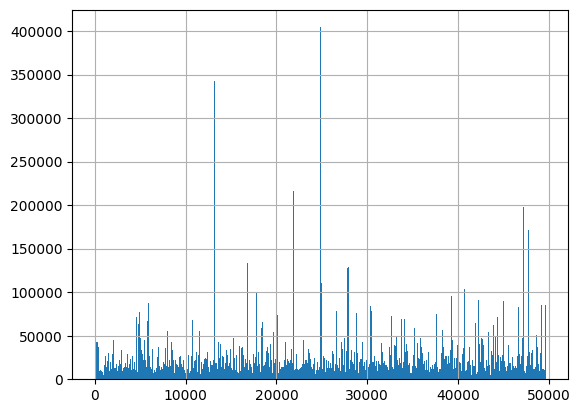

In [5]:
data_transactions.product_id.hist(bins=1000)

In [6]:
data_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26408073 entries, 0 to 26408072
Data columns (total 9 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   order_number            int64  
 3   order_dow               int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       float64
 8   reordered               float64
dtypes: float64(3), int64(6)
memory usage: 1.8 GB


In [7]:
# объединение по product_id
data_merge = data_transactions.merge(data_products, left_on='product_id', right_on='product_id')
data_merge.shape

(26408073, 14)

In [8]:
# группировка по user_id и product_id и сортировка по кол-ву купленных товаров
popularity = data_merge.groupby(['user_id', 'product_id'])['order_id'].count().reset_index()
popularity.rename(columns={'order_id': 'n_sold'}, inplace=True)
data_merge_group = popularity.sort_values('n_sold', ascending=False)
data_merge_group.shape

(9459065, 3)

In [9]:
data_merge_group.head(), data_merge_group.tail()

(         user_id  product_id  n_sold
 1886836    41356        6583      99
 1886854    41356       14366      99
 1886893    41356       38652      99
 1886878    41356       29671      98
 818020     17997        4210      98,
          user_id  product_id  n_sold
 5658899   122781       37076       1
 5658898   122781       36695       1
 2338424    50901       18434       1
 2338426    50901       19893       1
 1802770    39586       35898       1)

<Axes: >

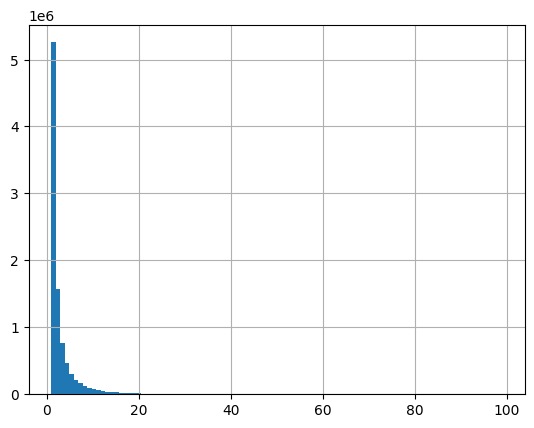

In [10]:
data_merge_group.n_sold.hist(bins=100)

In [11]:
# группировка по user_id и сортировка по кол-ву покупок
popularity = data_merge.groupby(['user_id'])['order_id'].count().reset_index()
popularity.rename(columns={'order_id': 'n_buy_full'}, inplace=True)
data_user_group = popularity.sort_values('n_buy_full', ascending=False)
print(data_user_group.shape)
data_user_group.head()

(100000, 2)


,user_id,n_buy_full
97601,201268,3671
63170,129928,3638
79663,164055,3061
85550,176478,2921
88401,182401,2907


In [12]:
data_user_group[data_user_group.n_buy_full < 100].shape

(22613, 2)

In [13]:
# группировка по product_id и сортировка по кол-ву покупок
popularity = data_merge.groupby(['product_id'])['order_id'].count().reset_index()
popularity.rename(columns={'order_id': 'n_sold_full'}, inplace=True)
data_product_group = popularity.sort_values('n_sold_full', ascending=False)
print(data_product_group.shape)
data_product_group.head()

(49465, 2)


,product_id,n_sold_full
24752,24852,391170
13119,13176,321553
21052,21137,226279
21814,21903,199961
47001,47209,183702


In [14]:
top_10_products = data_product_group.product_id.values[:10]
top_10_products

array([24852, 13176, 21137, 21903, 47209, 47766, 47626, 27845, 27966,
       26209])

In [15]:
data_product_group[data_product_group.n_sold_full < 100].shape

(31643, 2)

In [16]:
data_merge_group.shape

(9459065, 3)

In [17]:
data_merge_group = data_merge_group.merge(data_product_group, left_on='product_id', right_on='product_id')
print(data_merge_group.shape)
data_merge_group.head()

(9459065, 4)


,user_id,product_id,n_sold,n_sold_full
0,41356,6583,99,697
1,175658,6583,79,697
2,50679,6583,56,697
3,100330,6583,40,697
4,197799,6583,27,697


In [18]:
data_merge_group = data_merge_group.merge(data_user_group, left_on='user_id', right_on='user_id')
print(data_merge_group.shape)
data_merge_group.head()

(9459065, 5)


,user_id,product_id,n_sold,n_sold_full,n_buy_full
0,41356,6583,99,697,1554
1,41356,14366,99,1473,1554
2,41356,38652,99,598,1554
3,41356,29671,98,527,1554
4,41356,28204,3,74184,1554


## Топ 10 продуктов для каждого пользователя

In [33]:
#топ-10 продуктов для каждого пользователя
data_merge_group_ = data_merge_group.sort_values(by=['user_id', 'n_sold'], ascending=[True, False])
top_10_products_per_user = data_merge_group_.groupby('user_id').head(10)

In [34]:
top_10_products_per_user = top_10_products_per_user.groupby('user_id')['product_id'].apply(list).reset_index(name='top_products')

In [35]:
top_10_products_per_user['product_id'] = top_10_products_per_user.top_products.apply(lambda x: ' '.join(map(str, x)))
top_10_products_per_user.head()

,user_id,top_products,product_id
0,1,"[196, 12427, 10258, 25133, 13032, 46149, 13176...",196 12427 10258 25133 13032 46149 13176 49235 ...
1,2,"[32792, 47209, 24852, 19156, 18523, 1559, 3375...",32792 47209 24852 19156 18523 1559 33754 12000...
2,3,"[39190, 47766, 21903, 9387, 17668, 43961, 1679...",39190 47766 21903 9387 17668 43961 16797 22035...
3,7,"[40852, 37602, 17638, 21137, 31683, 13198, 492...",40852 37602 17638 21137 31683 13198 4920 30391...
4,13,"[27086, 4210, 27435, 1689, 33735, 43086, 5652,...",27086 4210 27435 1689 33735 43086 5652 25134 4...


In [36]:
top_10_products_per_user[['user_id', 'product_id']].to_csv('sample_submission.csv', index=False)

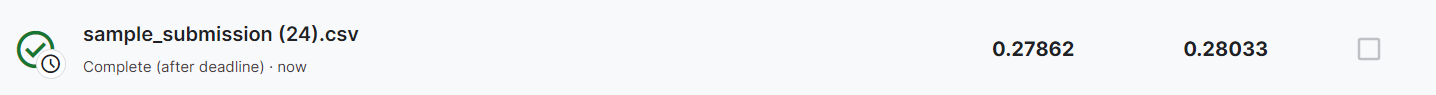

## формирование обучающих данных

т.к. данных очень много берем пары (user_id - product_id), где куплено больше n_delete раза, в остальных случаях присвиваем продукту id = 0

это поможет с Холодным стартом

In [ ]:
n_delete = 10
data_merge_group.shape, data_merge_group[data_merge_group.n_sold <= n_delete].shape

((9459065, 5), (9058224, 5))

In [ ]:
data_merge_group_new_1 = data_merge_group.copy()
data_merge_group_new_1.tail()

,user_id,product_id,n_sold,n_sold_full,n_buy_full
9459060,66955,25059,1,223,18
9459061,66955,2944,11,72,18
9459062,66955,48422,4,16,18
9459063,66955,4026,2,10,18
9459064,20121,17426,10,478,10


In [ ]:
data_merge_group_new_1.user_id.nunique(), data_merge_group_new_1.product_id.nunique()

(100000, 49465)

In [ ]:
data_merge_group_new_1.product_id.loc[data_merge_group_new_1[data_merge_group_new_1.n_sold <= n_delete].index] = 0
data_merge_group_new_1.tail()

,user_id,product_id,n_sold,n_sold_full,n_buy_full
9459060,66955,0,1,223,18
9459061,66955,2944,11,72,18
9459062,66955,0,4,16,18
9459063,66955,0,2,10,18
9459064,20121,0,10,478,10


In [ ]:
data_merge_group_new_1.head()

,user_id,product_id,n_sold,n_sold_full,n_buy_full
0,41356,6583,99,697,1554
1,41356,14366,99,1473,1554
2,41356,38652,99,598,1554
3,41356,29671,98,527,1554
4,41356,0,3,74184,1554


In [ ]:
data_merge_group_new_1.user_id.nunique(), data_merge_group_new_1.product_id.nunique()

(100000, 18995)

In [ ]:
# удаляем данные где покупок меньше n_delete
data_merge_group_new_2 = data_merge_group_new_1[data_merge_group_new_1.n_sold > n_delete]
print(data_merge_group_new_2.shape)
data_merge_group_new_2.tail()

In [ ]:
data_merge_group_new_2.user_id.nunique(), data_merge_group_new_1.product_id.nunique()

(59901, 18995)

In [ ]:
# для айдишников пользователей которых нет
# можно предсказывать товары, которые уже они покупали или самые популярные товары

# Коллаборативная фильтрация

## формирование coo_matrix





In [ ]:
data_merge_group_new_1 = data_merge_group_new_2

In [ ]:
from scipy.sparse import csr_matrix, coo_matrix

In [ ]:
users_inv_mapping = dict(enumerate(data_merge_group_new_1['user_id'].unique()))
users_mapping = {v: k for k, v in users_inv_mapping.items()}
len(users_mapping)

59901

In [ ]:
users_inv_mapping

In [ ]:
items_inv_mapping = dict(enumerate(data_merge_group_new_1['product_id'].unique()))
items_mapping = {v: k for k, v in items_inv_mapping.items()}
len(items_mapping)

18994

In [ ]:
items_inv_mapping

In [ ]:
row = data_merge_group_new_1['user_id'].map(users_mapping.get)
col = data_merge_group_new_1['product_id'].map(items_mapping.get)

In [ ]:
col

0              0
1              1
2              2
3              3
4              4
           ...  
9459060        4
9459061    23833
9459062    31051
9459063        4
9459064     9452
Name: product_id, Length: 9459065, dtype: int64

In [ ]:
data = np.ones(data_merge_group_new_1.shape[0])
data =  data_merge_group_new_1.n_sold.tolist() # на основе кол-ва продаж user-product
# data =  data_merge_group_new_1.n_sold_full.tolist() # на основе общих кол-ва продаж
coo = coo_matrix((data, (row, col)),)
sparse_user_item = coo.tocsr()
sparse_user_item

<59901x18994 sparse matrix of type '<class 'numpy.int64'>'
	with 400841 stored elements in Compressed Sparse Row format>

## обучение

In [ ]:
pip install implicit

In [ ]:
from implicit.nearest_neighbours import ItemItemRecommender, CosineRecommender, TFIDFRecommender, BM25Recommender
from implicit.als import AlternatingLeastSquares

In [ ]:
K = 10 # кол-во предсказаний

In [ ]:
# model = ItemItemRecommender(K=K)

# model.fit(sparse_user_item.T,
#           show_progress=True)

In [ ]:
factors=500
iterations=3
regularization=0.01
show_progress=True
model = AlternatingLeastSquares(
    factors=factors,
    iterations=iterations,
    regularization=regularization,
    num_threads=4,
    random_state=42
  )
model.fit(sparse_user_item,
          show_progress=show_progress)

  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
recs = model.recommend(userid=0,
                        user_items=sparse_user_item,
                        N=K,
                        filter_already_liked_items=False,
                        # filter_items=[items_mapping[0]],
                        # recalculate_user=True
                       )
recs

(array([19, 20,  5, 15,  6,  1, 17, 18, 11,  0], dtype=int32),
 array([1.0778222, 1.0468707, 1.0413046, 1.0401082, 1.0372536, 1.033876 ,
        1.0290911, 1.0273049, 1.0207707, 1.0177453], dtype=float32))

In [ ]:
users_inv_mapping[44]

79607

In [ ]:
# items_inv_mapping

In [ ]:
items_mapping[0]

34428

## инференс

In [ ]:
product_id = []
for userid in tqdm(users_mapping.values()):
  recs = model.recommend(userid=userid,
                        user_items=sparse_user_item,
                        N=K,
                        filter_already_liked_items=False,
                        # filter_items=[items_mapping[0]],
                        # recalculate_user=True
                         )
  res_ids = [items_inv_mapping[item_id] for item_id in recs[0]]
  product_id.append(' '.join(map(str, res_ids)))

100%|██████████| 59901/59901 [06:05<00:00, 164.06it/s]


In [ ]:
recs[0]

In [ ]:
product_id_0 = product_id
len(product_id_0)

81188

In [ ]:
# добавление недостающих айдишников и присваивание им топ10 продуктов
user_id = users_mapping.keys()
user_id = list(user_id)
print(len(user_id))
print(len(product_id))
for element in data_merge_group.user_id.unique():
  if element not in user_id:
    user_id.append(element)
    product_id.append(' '.join(map(str, top_10_products)))
len(user_id)

In [ ]:
# добавление недостающих айдишников и присваивание им топ10 продуктов, которые они покупали
# если купленных товаров меньше 10, то добавляются самые популярные
user_id = users_mapping.keys()
user_id = list(user_id)
print(len(user_id))
for element in data_merge_group.user_id.unique():
  if element not in user_id:
    user_id.append(element)
    top_10_products_per_user_ = top_10_products_per_user[top_10_products_per_user.user_id == element].top_products.values[0]
    top_10_products_per_user_ = top_10_products_per_user_ + list(top_10_products[:10-len(top_10_products_per_user_)])
    product_id.append(' '.join(map(str, top_10_products_per_user_)))
len(user_id)

59901


100000

In [ ]:
data_res = pd.DataFrame({'user_id': user_id, 'product_id':product_id})
data_res.to_csv('sample_submission.csv', index=False)

In [ ]:
data_res = pd.read_csv('sample_submission.csv')
data_res.tail()

,user_id,product_id
99995,21809,9755 27510 21050 23572 12916 31992 43812 19774...
99996,88834,44471 40153 7749 1090 43928 32611 23211 43743 ...
99997,105485,38060 31992 4258 35982 44405 9175 26767 24273 ...
99998,201099,26040 43026 7512 3858 24011 19607 24852 13176 ...
99999,15613,6166 40256 45496 5262 25783 3522 33493 9302 14...


In [ ]:
data_merge_group.head(20)

,user_id,product_id,n_sold
1886836,41356,6583,99
1886854,41356,14366,99
1886893,41356,38652,99
1886878,41356,29671,98
818020,17997,4210,98
6515535,141736,25133,98
4774417,103593,28204,98
4597563,99707,24852,97
5573764,120897,12013,97
4599419,99753,27845,96


# LightFM

In [ ]:
pip install lightfm

In [ ]:
from lightfm.data import Dataset
from lightfm import LightFM

In [ ]:
dataset = Dataset()
dataset.fit(
    set(data_users['user_id']),
    set(data_products['product_id']))

## формирование признаков

In [ ]:
data_products = data_products.merge(data_product_group, left_on='product_id', right_on='product_id', how='outer')
print(data_products.shape)
data_products.head()

(49688, 8)


,product_id,product_name,aisle_id,department_id,aisle,department,n_sold_full_x,n_sold_full_y
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,1549.0,1549.0
1,2,All-Seasons Salt,104,13,spices seasonings,pantry,80.0,80.0
2,3,Robust Golden Unsweetened Oolong Tea,94,7,tea,beverages,242.0,242.0
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen meals,frozen,215.0,215.0
4,5,Green Chile Anytime Sauce,5,13,marinades meat preparation,pantry,11.0,11.0


In [ ]:
data_products.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'aisle',
       'department', 'n_sold_full_x', 'n_sold_full_y'],
      dtype='object')

In [ ]:
data_transactions.columns

Index(['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'add_to_cart_order',
       'reordered'],
      dtype='object')

In [ ]:
data_users = data_transactions.groupby(['user_id'])['order_dow',	'order_hour_of_day'].median().reset_index()
print(data_users.shape)
data_users.head()

<ipython-input-38-7b954e2615e9>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_users = data_transactions.groupby(['user_id'])['order_dow',	'order_hour_of_day'].median().reset_index()


(100000, 3)


,user_id,order_dow,order_hour_of_day
0,1,3.0,9.0
1,2,2.0,10.0
2,3,0.0,16.0
3,7,1.0,13.0
4,13,6.0,14.0


In [ ]:
data_users = data_users.merge(data_user_group, left_on='user_id', right_on='user_id', how='outer')
print(data_users.shape)
data_users.head()

(100000, 4)


,user_id,order_dow,order_hour_of_day,n_buy_full
0,1,3.0,9.0,59
1,2,2.0,10.0,195
2,3,0.0,16.0,82
3,7,1.0,13.0,206
4,13,6.0,14.0,81


In [ ]:
data_users['feature_1'] = 1

In [ ]:
data_users.columns

Index(['user_id', 'order_dow', 'order_hour_of_day', 'n_buy_full', 'feature_1'], dtype='object')

In [ ]:
def generate_feature_list(dataframe, features_name):
    features = dataframe[features_name].apply(
        lambda x: ','.join(x.map(str)), axis=1)
    features = features.str.split(',')
    features = features.apply(pd.Series).stack().reset_index(drop=True)
    return features

In [ ]:
products_features = ['product_name',	'aisle',	'department'] # , 'n_sold_full'
products_feature_list = generate_feature_list(
    data_products,
    products_features
    )

In [ ]:
products_feature_list

0         Chocolate Sandwich Cookies
1                      cookies cakes
2                             snacks
3                   All-Seasons Salt
4                  spices seasonings
                     ...            
153944                 cat food care
153945                          pets
153946        Fresh Foaming Cleanser
153947                   facial care
153948                 personal care
Length: 153949, dtype: object

In [ ]:
users_features = ['feature_1'] # 'order_dow',	'order_hour_of_day' , 'n_buy_full'
users_feature_list = generate_feature_list(
    data_users,
    users_features)

In [ ]:
users_feature_list

0        1
1        1
2        1
3        1
4        1
        ..
99995    1
99996    1
99997    1
99998    1
99999    1
Length: 100000, dtype: object

In [ ]:
def create_features(dataframe, features_name, id_col_name):
    features = dataframe[features_name].apply(
        lambda x: ','.join(x.map(str)), axis=1)
    features = features.str.split(',')
    features = list(zip(dataframe[id_col_name], features))
    return features

In [ ]:
# creating features for feeding into lightfm
data_products['products_features'] = create_features(
    data_products,
    products_features,
    'product_id')

data_users['user_features'] = create_features(
    data_users,
    users_features,
    'user_id')

In [ ]:
data_products.head()

,product_id,product_name,aisle_id,department_id,aisle,department,n_sold_full_x,n_sold_full_y,products_features
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,1549.0,1549.0,"(1, [Chocolate Sandwich Cookies, cookies cakes..."
1,2,All-Seasons Salt,104,13,spices seasonings,pantry,80.0,80.0,"(2, [All-Seasons Salt, spices seasonings, pant..."
2,3,Robust Golden Unsweetened Oolong Tea,94,7,tea,beverages,242.0,242.0,"(3, [Robust Golden Unsweetened Oolong Tea, tea..."
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen meals,frozen,215.0,215.0,"(4, [Smart Ones Classic Favorites Mini Rigaton..."
4,5,Green Chile Anytime Sauce,5,13,marinades meat preparation,pantry,11.0,11.0,"(5, [Green Chile Anytime Sauce, marinades meat..."


In [ ]:
# calculate our weight value
data_merge_group_new_2['total_weights'] = (data_merge_group_new_2['n_sold']) / (
    data_merge_group_new_2['n_sold'].max())

In [ ]:
# calculate our weight value # ПОПРОБОВАТЬ ТАК и без весов вообще
data_merge_group_new_2['total_weights'] = 1 / (
    data_merge_group_new_2['n_sold'])

In [ ]:
# calculate our weight value
data_merge_group_new_2 = data_merge_group.copy()
data_merge_group_new_2['total_weights'] = (data_merge_group_new_2['n_sold_full']) / (
    data_merge_group_new_2['n_sold_full'].max())

In [ ]:
dataset.fit_partial(
    item_features=products_feature_list)
dataset.fit_partial(
    user_features=users_feature_list)

In [ ]:
len(set(data_products['product_id']))

49688

In [ ]:
list(set(data_products['product_id']))[-5:]

[49684, 49685, 49686, 49687, 49688]

In [ ]:
lightfm_mapping = dataset.mapping()
lightfm_mapping = {
    'users_mapping': lightfm_mapping[0],
    # 'user_features_mapping': lightfm_mapping[1],
    'items_mapping': lightfm_mapping[2],
    # 'item_features_mapping': lightfm_mapping[3],
}
lightfm_mapping['users_inv_mapping'] = {v: k for k, v in lightfm_mapping['users_mapping'].items()}
lightfm_mapping['items_inv_mapping'] = {v: k for k, v in lightfm_mapping['items_mapping'].items()}

In [ ]:
lightfm_mapping['items_inv_mapping']

## формирование coo_matrix





In [ ]:
# без учета весов
data_merge_group_new_2['user_product_id_tuple'] = list(zip(
    data_merge_group_new_2.user_id,
    data_merge_group_new_2.product_id))
data_merge_group_new_2.head()

,user_id,product_id,n_sold,n_sold_full,n_buy_full,user_product_id_tuple
0,41356,6583,99,697,1554,"(41356, 6583)"
1,41356,14366,99,1473,1554,"(41356, 14366)"
2,41356,38652,99,598,1554,"(41356, 38652)"
3,41356,29671,98,527,1554,"(41356, 29671)"
4,41356,28204,3,74184,1554,"(41356, 28204)"


In [ ]:
# с учетом весов
data_merge_group_new_2['user_product_id_tuple'] = list(zip(
    data_merge_group_new_2.user_id,
    data_merge_group_new_2.product_id,
    data_merge_group_new_2.total_weights))
data_merge_group_new_2.head()

,user_id,product_id,n_sold,n_sold_full,n_buy_full,total_weights,user_product_id_tuple
0,41356,6583,99,697,1554,0.010101,"(41356, 6583, 0.010101010101010102)"
1,41356,14366,99,1473,1554,0.010101,"(41356, 14366, 0.010101010101010102)"
2,41356,38652,99,598,1554,0.010101,"(41356, 38652, 0.010101010101010102)"
3,41356,29671,98,527,1554,0.010204,"(41356, 29671, 0.01020408163265306)"
4,41356,28204,3,74184,1554,0.333333,"(41356, 28204, 0.3333333333333333)"


In [ ]:
data_merge_group_new_2.tail()

,user_id,product_id,n_sold,n_sold_full,n_buy_full,total_weights,user_product_id_tuple
9459060,66955,25059,1,223,18,1.000000,"(66955, 25059)"
9459061,66955,2944,11,72,18,0.090909,"(66955, 2944)"
9459062,66955,48422,4,16,18,0.250000,"(66955, 48422)"
9459063,66955,4026,2,10,18,0.500000,"(66955, 4026)"
9459064,20121,17426,10,478,10,0.100000,"(20121, 17426)"


In [ ]:
interactions, weights = dataset.build_interactions(
    data_merge_group_new_2['user_product_id_tuple'])
interactions, weights

(<100000x49688 sparse matrix of type '<class 'numpy.int32'>'
 	with 9459065 stored elements in COOrdinate format>,
 <100000x49688 sparse matrix of type '<class 'numpy.float32'>'
 	with 9459065 stored elements in COOrdinate format>)

In [ ]:
interactions = sparse_user_item
interactions

<100000x34429 sparse matrix of type '<class 'numpy.int64'>'
	with 1956581 stored elements in Compressed Sparse Row format>

In [ ]:
user_features = dataset.build_user_features(
    data_users['user_features'])

products_features = dataset.build_item_features(
    data_products['products_features'])
user_features.shape, products_features.shape

((100000, 100001), (49688, 101108))

## обучение

In [ ]:
K = 10 # кол-во предсказаний

In [ ]:
model = LightFM(
    no_components=32,
    learning_rate=0.05,
    loss='warp',
    random_state=42
    )

In [ ]:
model.fit(
    interactions,
    # item_features=products_features,
    # user_features=user_features,
    # sample_weight=weights,
    epochs=10,
    num_threads=4,
    verbose=True,
)

Epoch: 100%|██████████| 10/10 [04:50<00:00, 29.02s/it]


In [ ]:
from lightfm.evaluation import auc_score

In [ ]:
# Compute and print the AUC score
train_auc = auc_score(model, interactions, num_threads=4).mean()
train_auc

0.9852721

In [ ]:
model.item_biases *= 0.0
train_auc = auc_score(model, interactions, num_threads=4).mean()
train_auc

In [ ]:
items_mapping

In [ ]:
item_ids=list(items_mapping.values())
item_ids

In [ ]:
items_mapping[0]

4

In [ ]:
item_ids=list(lightfm_mapping['items_mapping'].values())

In [ ]:
users_inv_mapping[0]

41356

In [ ]:
scores = model.predict(
        user_ids=10,
        item_ids=item_ids,
        # item_features=products_features,
        # user_features=user_features,
          num_threads=4)
scores

array([ 2.0484884, -1.8555564, -1.8387486, ..., -1.6290866, -1.2036643,
       -1.4664881], dtype=float32)

In [ ]:
lightfm_mapping['users_mapping'][41356]

20059

In [ ]:
# %%time
ids = np.argpartition(scores, -np.arange(K+1))[-(K+1):][::-1]
res_ids = [lightfm_mapping['items_inv_mapping'][ids_] for ids_ in ids]
res_ids

[13176, 6184, 196, 12341, 38768, 16797, 8571, 31759, 13575, 16953, 11759]

In [ ]:
items_inv_mapping[4]

0

In [ ]:
ids = np.argpartition(scores, -np.arange(K+1))[-(K+1):][::-1]
res_ids = [items_inv_mapping[ids_] for ids_ in ids]
res_ids.remove(0) if 0 in res_ids else res_ids[:-1]
res_ids

[21903, 13176, 24852, 21137, 44632, 27845, 47209, 11520, 47766, 4605]

In [ ]:
ids

array([  8,  16,  14,   4, 143, 668,  97,  12, 315, 317,   9])

## инференс

In [ ]:
import multiprocessing
multiprocessing.cpu_count()

2

In [ ]:
res = []
user_ids = users_mapping.values()
for user_id in tqdm(user_ids):
  scores = model.predict(
          user_ids=user_id,
          item_ids=item_ids,
          # item_features=products_features,
          # user_features=user_features,
          num_threads=4)
  ids = np.argpartition(scores, -np.arange(K+1))[-(K+1):][::-1]
  res_ids = [items_inv_mapping[ids_] for ids_ in ids]
  res_ids.remove(0) if 0 in res_ids else res_ids[:-1]
  product_id = ' '.join(map(str, res_ids))
  res.append(product_id)

100%|██████████| 100000/100000 [13:06<00:00, 127.11it/s]


In [ ]:
res = []
user_ids = lightfm_mapping['users_mapping'].values()
for user_id in tqdm(user_ids):
  scores = model.predict(
          user_ids=user_id,
          item_ids=item_ids,
          # item_features=products_features,
          # user_features=user_features,
          num_threads=4)
  ids = np.argpartition(scores, -np.arange(K))[-K:][::-1]
  res_ids = [lightfm_mapping['items_inv_mapping'][ids_] for ids_ in ids]
  product_id = ' '.join(map(str, res_ids))
  res.append(product_id)

100%|██████████| 100000/100000 [19:10<00:00, 86.92it/s]


In [ ]:
res[0]

'13176 16797 21137 43352 21903 12341 39275 35561 4920 30450'

In [ ]:
product_id = res
user_id = users_mapping.keys()
data_res = pd.DataFrame({'user_id': user_id, 'product_id': product_id})
data_res.to_csv('sample_submission.csv', index=False)

In [ ]:
product_id = res
user_id = lightfm_mapping['users_mapping'].keys()
data_res = pd.DataFrame({'user_id': user_id, 'product_id': product_id})
data_res.to_csv('sample_submission.csv', index=False)

In [ ]:
data_res = pd.read_csv('sample_submission.csv')
data_res.head()

,user_id,product_id
0,1,13176 16797 21137 43352 21903 12341 39275 3556...
1,2,13176 42265 24852 21137 45066 30489 39275 2212...
2,3,24852 21137 21903 13176 16797 42265 39275 4920...
3,7,24852 21137 42265 47626 13176 47766 16797 3927...
4,13,47626 31553 26209 39275 27104 45007 30406 3150...


In [ ]:
product_id[0]

'24852 13176 16797 21137 28204 43352 39275 47626 26604 49235'

In [ ]:
data_merge_group[data_merge_group.user_id == 1].product_id.unique()

array([25133,   196, 13176, 38928, 35951, 49235, 30450, 14084, 13032,
       39657, 12427, 46149, 17122, 10326, 41787, 10258, 26088, 26405])

In [ ]:
data_product_group.head(10)

,product_id,n_sold_full
24752,24852,391170
13119,13176,321553
21052,21137,226279
21814,21903,199961
47001,47209,183702
47555,47766,141632
47417,47626,122080
27728,27845,118954
27849,27966,118073
26099,26209,115506


In [ ]:
data_merge_group.head(20)

,user_id,product_id,n_sold,n_sold_full,n_buy_full
0,41356,6583,99,697,1554
1,41356,14366,99,1473,1554
2,41356,38652,99,598,1554
3,41356,29671,98,527,1554
4,41356,28204,3,74184,1554
5,41356,24852,52,391170,1554
6,41356,38689,82,30761,1554
7,41356,11187,93,892,1554
8,41356,13176,36,321553,1554
9,41356,44632,5,62563,1554


# Результаты

In [ ]:
ItemItemRecommender

csr

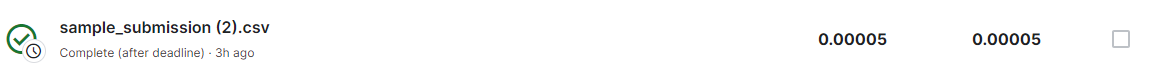

## Коллаборативная фильтрация

In [ ]:
AlternatingLeastSquares

factors=200
iterations=15
regularization=0.01

coo

ничего не заменяется / не удаляется

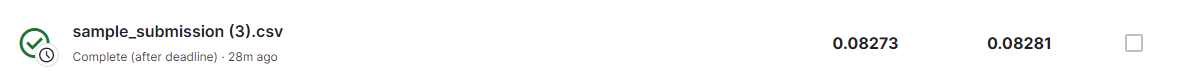

In [ ]:
AlternatingLeastSquares

factors=500
iterations=3
regularization=0.01
coo

заменяются везде где 1 (остается в предиктах 0)

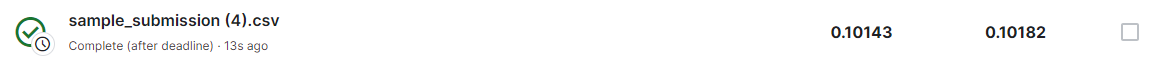

In [ ]:
AlternatingLeastSquares

factors=500
iterations=3
regularization=0.01
coo

заменяются везде где 2 (остается в предиктах 0)

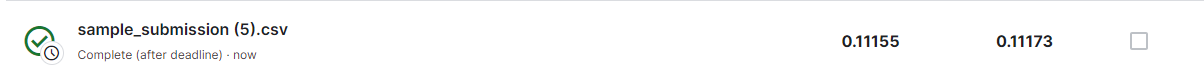

In [ ]:
AlternatingLeastSquares

factors=500
iterations=3
regularization=0.01
coo

заменяются везде где 2 (не остается в предиктах 0)

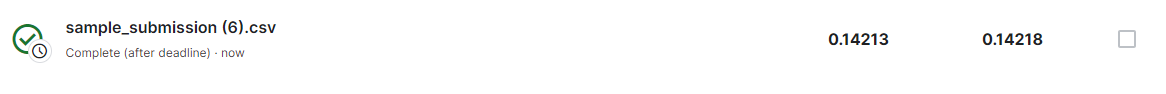

In [ ]:
AlternatingLeastSquares

factors=500
iterations=3
regularization=0.01
coo

заменяются везде где 3 (не остается в предиктах 0)

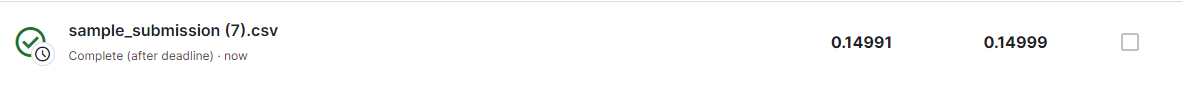

In [ ]:
AlternatingLeastSquares

factors=500
iterations=10
regularization=0.01
coo

заменяются везде где 3 (не остается в предиктах 0)

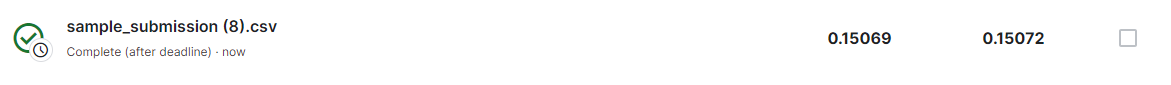

In [ ]:
AlternatingLeastSquares

factors=500
iterations=3
regularization=0.01
coo (на основе кол-ва продаж)

заменяются везде где 3 (не остается в предиктах 0)

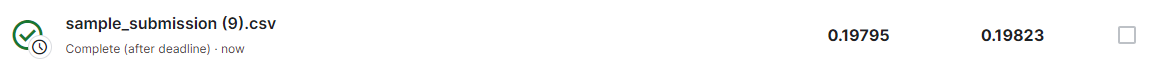

In [ ]:
AlternatingLeastSquares

factors=500
iterations=10
regularization=0.01
coo (на основе кол-ва продаж)

заменяются везде где 3 (не остается в предиктах 0)

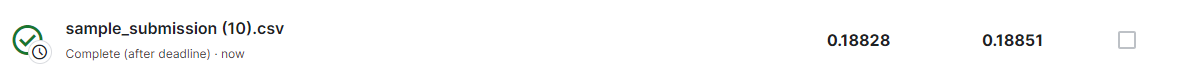

In [ ]:
AlternatingLeastSquares

factors=500
iterations=3
regularization=0.01
coo (на основе общего кол-ва продаж)

заменяются везде где 3 (не остается в предиктах 0)

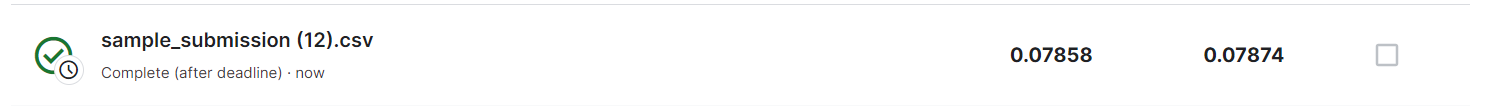

In [ ]:
AlternatingLeastSquares

factors=500
iterations=3
regularization=0.01
coo (на основе кол-ва продаж)

удаляются везде где 3 (не остается в предиктах 0)
в недостающих айди присваивается топ 10 продуктов

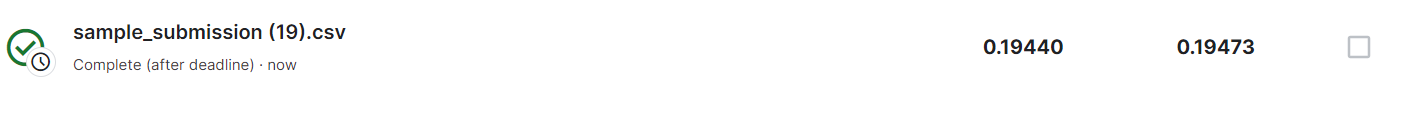

In [ ]:
AlternatingLeastSquares

factors=500
iterations=3
regularization=0.01
coo (на основе кол-ва продаж)

удаляются везде где 3 (не остается в предиктах 0)
в недостающих айди присваивается топ 10 продуктов для каждого пользователя

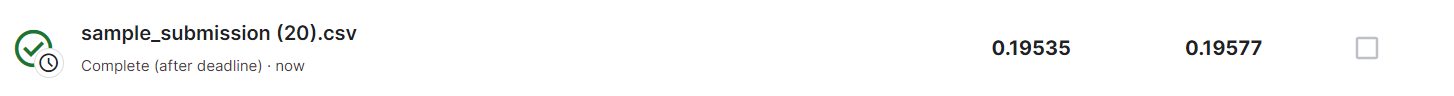

In [ ]:
AlternatingLeastSquares

factors=500
iterations=3
regularization=0.01
coo (на основе кол-ва продаж)

удаляются везде где 3 (не остается в предиктах 0)
в недостающих айди присваивается топ 10 продуктов для каждого пользователя
если купленных товаров меньше 10, то добавляются самые популярные

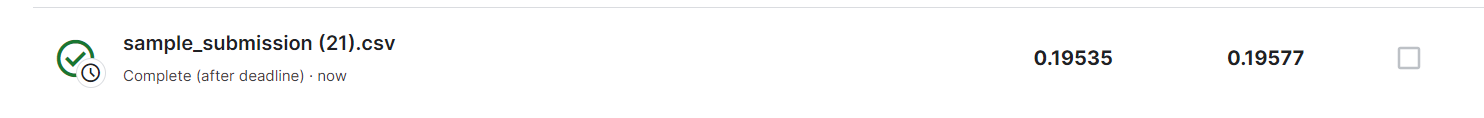

In [ ]:
AlternatingLeastSquares

factors=500
iterations=3
regularization=0.01
coo (на основе кол-ва продаж)

удаляются везде где 10 (не остается в предиктах 0)
в недостающих айди присваивается топ 10 продуктов для каждого пользователя
если купленных товаров меньше 10, то добавляются самые популярные

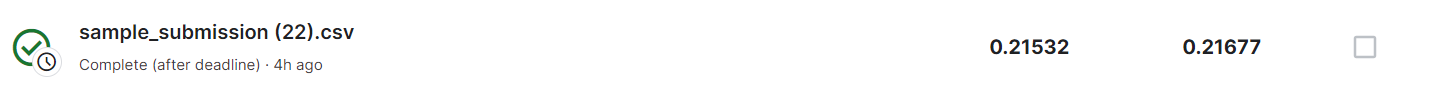

## Топ 10 продуктов для каждого пользователя

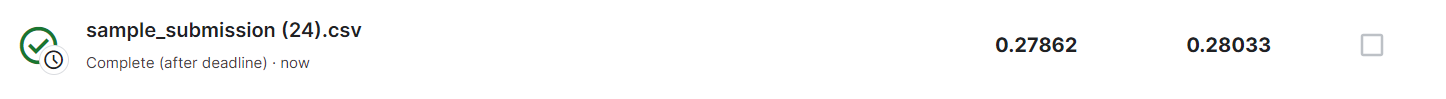

## LightFM

In [ ]:
LightFM

no_components=32,
learning_rate=0.05,
loss='warp',
random_state=42

3 эпохи

coo (на основе кол-ва продаж) ((data_merge_group_new_2['n_sold']) / (
    data_merge_group_new_2['n_sold'].max()))

ничего не заменеются / не удаляется

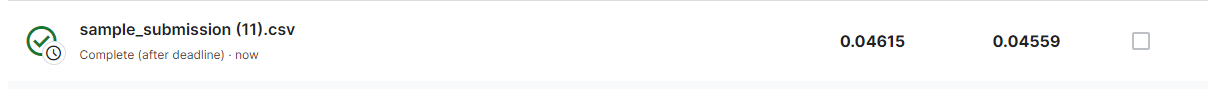

In [ ]:
LightFM

no_components=32,
learning_rate=0.05,
loss='warp',
random_state=42

10 эпохи

coo (на основе кол-ва продаж) (1 / (
    data_merge_group_new_2['n_sold']))

ничего не заменяется / не удаляется

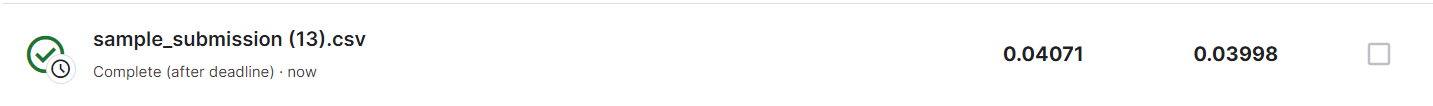

In [ ]:
LightFM

no_components=32,
learning_rate=0.05,
loss='warp',
random_state=42

10 эпохи

coo

ничего не заменяются / не удаляется

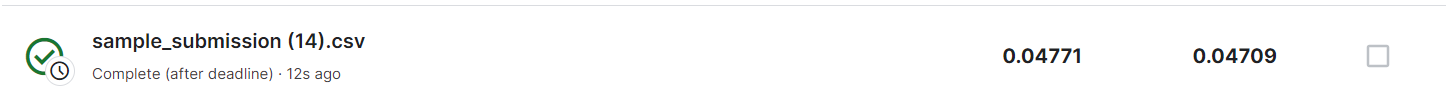

In [ ]:
LightFM

no_components=32,
learning_rate=0.05,
loss='warp',
random_state=42

10 эпохи

coo с колаборативной
без учета признаков

заменяются везде где 3 (остается в предиктах 0)

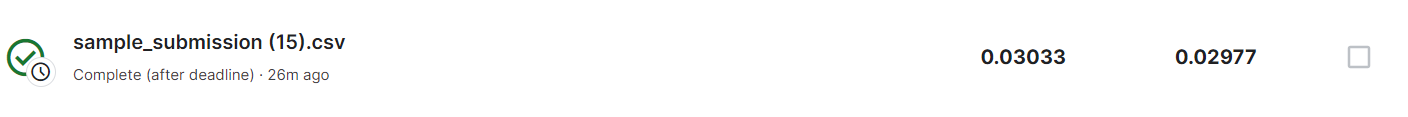

In [ ]:
LightFM

no_components=32,
learning_rate=0.05,
loss='warp',
random_state=42

10 эпохи

coo с колаборативной
без учета признаков

удаляются везде где 3 (остается в предиктах 0)

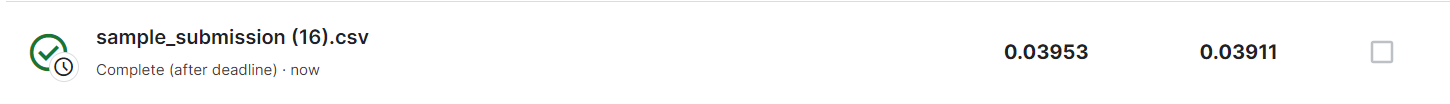

In [ ]:
LightFM

no_components=32,
learning_rate=0.05,
loss='warp',
random_state=42

10 эпохи

coo с колаборативной
без учета признаков

удаляются везде где 3 (не остается в предиктах 0)

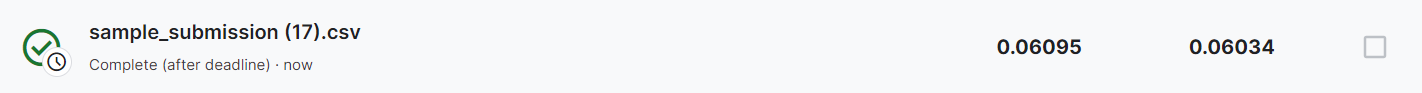

In [ ]:
LightFM

no_components=32,
learning_rate=0.05,
loss='warp',
random_state=42

10 эпохи

coo
без учета признаков

ничего не удаляется

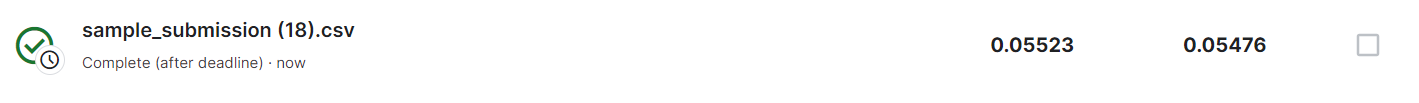